In [1]:
# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv')

In [4]:
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Data Manipulation

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Handling of missing data by dropping columns (keeping some columns aside)

diabetes_df = diabetes.drop(['Pregnancies','Outcome'], axis=1)

In [8]:
diabetes_df.replace(0, np.nan, inplace = True)

In [9]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [10]:
diabetes_df['Insulin'].mean()

155.5482233502538

In [11]:
np.round(diabetes_df['Insulin'].mean())

156.0

In [12]:
diabetes_df['Insulin'].replace(np.nan, np.round(diabetes_df['Insulin'].mean()), inplace = True)

In [13]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#### Impute Method

In [14]:
from sklearn.impute import SimpleImputer
# Stretegy = 'mean', 'median', 'most_frequent'(i.e. mode)
imputer = SimpleImputer(strategy = 'median')

In [15]:
x_data = imputer.fit_transform(diabetes_df)

In [16]:
x_data

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [17]:
diabetes_df2 = pd.DataFrame(x_data, columns = diabetes_df.columns)

In [18]:
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [19]:
diabetes_df2['Pregnancies'] = diabetes.Pregnancies
diabetes_df2['Outcome'] = diabetes.Outcome
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1


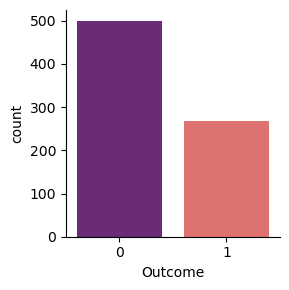

In [20]:
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes_df2, palette = 'magma', height = 3)

In [21]:
# Interpretation: Available data is imbalanced to train the model

In [22]:
diabetes_df2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Handling Imbalanced Data

#### Data Augmentation

In [23]:
# Generate the data to train the model
# Thera are two ways: 1. Upscaling 2. Adding the weightages

In [24]:
from sklearn.utils import resample
df_0 = diabetes_df2[diabetes_df2['Outcome'] == 0]
df_1 = diabetes_df2[diabetes_df2['Outcome'] == 1]

In [25]:
# We need to resample df_1
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [26]:
# Merge
diabetes_df3 = pd.concat([df_0, df_1_upsample])

In [27]:
diabetes_df3['Outcome'].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

#### Correlation

In [28]:
# Check if there is any multi colinerity

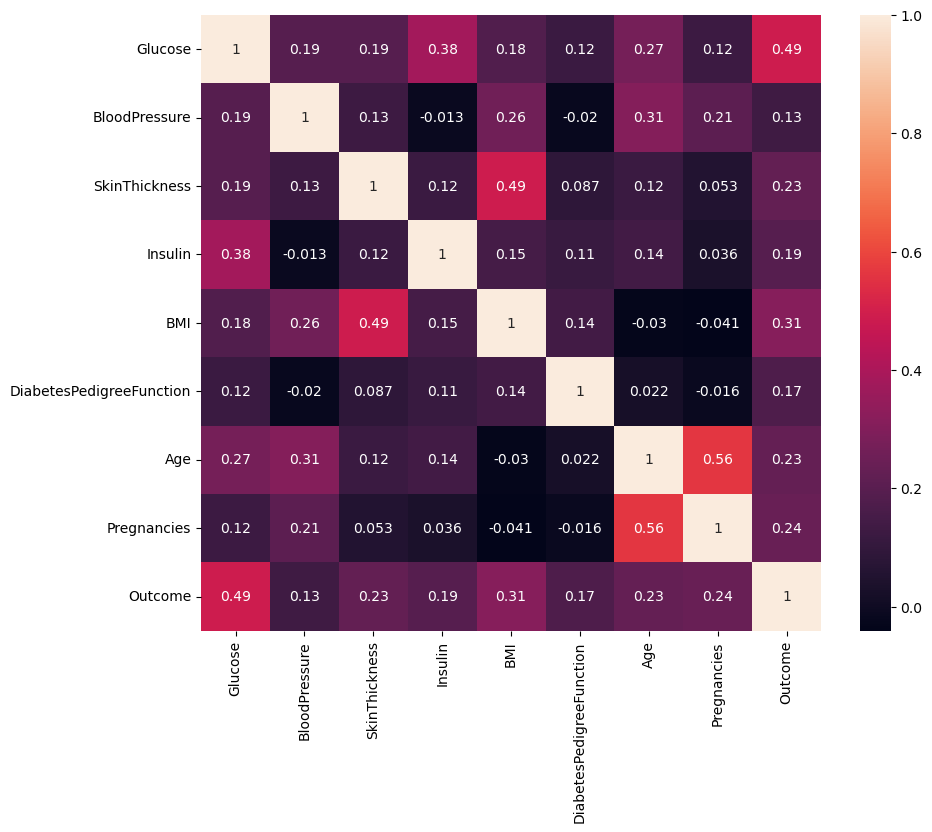

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_df3.corr(), annot =True)
plt.show()

In [30]:
# Interpretation: There is no multicolinearity

#### Split the data into features and target

In [31]:
X = diabetes_df3.drop(['Outcome'], axis =1)
Y = diabetes_df3['Outcome']

#### Split the data into Testing and Training sets

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#### Logistic Regression

In [33]:
 from sklearn.linear_model import LogisticRegression
 logit_model = LogisticRegression()

In [34]:
logit_model.fit(x_train, y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
 logit_model = LogisticRegression(solver = 'liblinear', max_iter = 10000000, C = 10, penalty = 'l1')
 logit_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=10000000, penalty='l1', solver='liblinear')

In [36]:
# Conclusion: The model has been trained properly

#### Check the performance of the model

In [37]:
logit_model.score(x_test, y_test)

0.785

#### Classification Metrics

In [38]:
yhat = logit_model.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)
# Diagonal values are correct predictions
# Off diagonal values are false predictions

array([[77, 19],
       [24, 80]], dtype=int64)

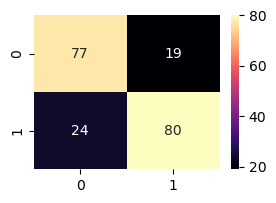

In [40]:
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix(y_test,yhat), annot=True, cmap='magma')
plt.show()

In [41]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        96
           1       0.81      0.77      0.79       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

